# W tym notebooku wykonano macierz korelacji 
Wykonana została na zmodyfikowanym pliku ze względu na źle posegregowane indeksy.
Indeksy segregowały się alfabetycznie, przez co dawało to niemiarodajne wyniki. Zostało to poprawione dzięki użyciu pliku "bazaUpdate.csv" zamiast "baza.csv".

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from apyori import apriori

In [24]:
opr = pd.read_csv('bazaUpdate.csv')
opr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   personid             112 non-null    int64 
 1   fk_test              112 non-null    int64 
 2   answers_id           112 non-null    int64 
 3   gender               112 non-null    object
 4   age                  112 non-null    int64 
 5   residence            112 non-null    object
 6   education            112 non-null    int64 
 7   SIknowledge          112 non-null    bool  
 8   result_id            112 non-null    int64 
 9   quizSI1              112 non-null    bool  
 10  quizSI2              112 non-null    bool  
 11  quizSI3              112 non-null    bool  
 12  quizSI4              112 non-null    bool  
 13  quizSI5              112 non-null    bool  
 14  quizSI6              112 non-null    bool  
 15  answers_id.1         112 non-null    int64 
 16  have_met

In [25]:
opr.head()

,personid,fk_test,answers_id,gender,age,residence,education,SIknowledge,result_id,quizSI1,quizSI2,quizSI3,quizSI4,quizSI5,quizSI6,answers_id.1,have_met,SIvsSystemy,feelings,EasyToFind,EasyToFindExample1,EasyToFindExample2,EasyToFindExample3,EasyToFindExample4,EasyToFindExample5,EasyToFindExample6,are_useful,fear,endangered,linkMonitoring1,linkMonitoring2,linkMonitoring3,linkMonitoring4,linkMonitoring5,linkMonitoring6,is_good,is_affecting,would_you_accept,is_helping,emotional_disorders
0,1,1,1,male,1,0-50k,4,True,1,True,True,True,True,True,True,1,False,True,Neutr,False,True,False,True,True,False,True,FALSE,False,False,True,True,False,False,True,False,False,True,False,TRUE,3
1,2,2,2,male,1,500k+,4,True,2,False,True,False,True,True,True,2,True,True,Negat,True,True,False,True,False,True,True,FALSE,True,True,True,False,False,False,True,False,False,True,False,IDK,1
2,3,3,3,male,1,500k+,5,True,3,True,False,False,True,False,False,3,True,True,Pozyt,False,False,True,False,True,True,True,IDK,True,False,True,False,False,True,False,False,False,True,False,FALSE,1
3,4,4,4,male,1,500k+,4,True,4,False,True,True,True,True,False,4,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,True,False,False,True,True,False,True,True,IDK,2
4,5,5,5,male,1,500k+,2,True,5,False,True,False,False,False,False,5,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,False,False,False,False,False,True,True,False,IDK,2


In [26]:
opr.isna().sum().sum()

0

In [27]:
opr.isnull().sum().sum()

0

In [28]:
df = opr.drop(['personid','fk_test','answers_id','result_id','answers_id.1'], axis=1)

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
df

,gender,age,residence,education,SIknowledge,quizSI1,quizSI2,quizSI3,quizSI4,quizSI5,quizSI6,have_met,SIvsSystemy,feelings,EasyToFind,EasyToFindExample1,EasyToFindExample2,EasyToFindExample3,EasyToFindExample4,EasyToFindExample5,EasyToFindExample6,are_useful,fear,endangered,linkMonitoring1,linkMonitoring2,linkMonitoring3,linkMonitoring4,linkMonitoring5,linkMonitoring6,is_good,is_affecting,would_you_accept,is_helping,emotional_disorders
0,male,1,0-50k,4,True,True,True,True,True,True,True,False,True,Neutr,False,True,False,True,True,False,True,FALSE,False,False,True,True,False,False,True,False,False,True,False,TRUE,3
1,male,1,500k+,4,True,False,True,False,True,True,True,True,True,Negat,True,True,False,True,False,True,True,FALSE,True,True,True,False,False,False,True,False,False,True,False,IDK,1
2,male,1,500k+,5,True,True,False,False,True,False,False,True,True,Pozyt,False,False,True,False,True,True,True,IDK,True,False,True,False,False,True,False,False,False,True,False,FALSE,1
3,male,1,500k+,4,True,False,True,True,True,True,False,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,True,False,False,True,True,False,True,True,IDK,2
4,male,1,500k+,2,True,False,True,False,False,False,False,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,False,False,False,False,False,True,True,False,IDK,2
5,female,1,500k+,4,True,True,True,False,False,True,False,True,True,Negat,True,True,True,True,True,True,True,TRUE,True,True,True,True,False,False,True,True,True,True,False,TRUE,3
6,male,1,0,4,True,True,True,True,True,True,True,True,True,Neutr,True,True,False,True,True,False,False,IDK,True,True,True,True,True,True,True,True,False,True,False,TRUE,3
7,male,1,0,4,True,False,True,True,True,True,False,True,True,Neutr,False,True,False,False,True,True,True,TRUE,False,True,True,False,False,True,True,True,True,True,True,TRUE,2
8,male,1,500k+,4,True,True,True,False,True,True,True,True,False,Neutr,False,False,False,False,True,False,True,IDK,False,False,True,True,False,True,True,False,False,True,False,IDK,2
9,male,1,500k+,2,True,False,False,False,False,False,True,True,True,Neutr,False,False,False,False,False,False,True,IDK,False,True,False,False,True,False,False,False,True,True,False,TRUE,2


In [31]:
df1 = df

In [32]:
from sklearn import preprocessing

categorical_values = df.columns

lab_encoder = preprocessing.LabelEncoder()
for col in categorical_values:
  df1[col] = lab_encoder.fit_transform(df[col])
  print(lab_encoder.classes_)
df1

['female' 'male' 'other']
[0 1 2]
['0' '0-50k' '100-500k' '50-100k' '500k+']
[0 1 2 3 4 5]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
['Negat' 'Neutr' 'Pozyt']
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
['FALSE' 'IDK' 'TRUE']
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
['FALSE' 'IDK' 'TRUE']
[0 1 2 3 4]


,gender,age,residence,education,SIknowledge,quizSI1,quizSI2,quizSI3,quizSI4,quizSI5,quizSI6,have_met,SIvsSystemy,feelings,EasyToFind,EasyToFindExample1,EasyToFindExample2,EasyToFindExample3,EasyToFindExample4,EasyToFindExample5,EasyToFindExample6,are_useful,fear,endangered,linkMonitoring1,linkMonitoring2,linkMonitoring3,linkMonitoring4,linkMonitoring5,linkMonitoring6,is_good,is_affecting,would_you_accept,is_helping,emotional_disorders
0,1,1,1,4,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,2,3
1,1,1,4,4,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1
2,1,1,4,5,1,1,0,0,1,0,0,1,1,2,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,1,1,4,4,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,2
4,1,1,4,2,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,2
5,0,1,4,4,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,2,1,1,1,1,0,0,1,1,1,1,0,2,3
6,1,1,0,4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,2,3
7,1,1,0,4,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,2,0,1,1,0,0,1,1,1,1,1,1,2,2
8,1,1,4,4,1,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,0,1,2
9,1,1,4,2,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,2,2


<AxesSubplot:>

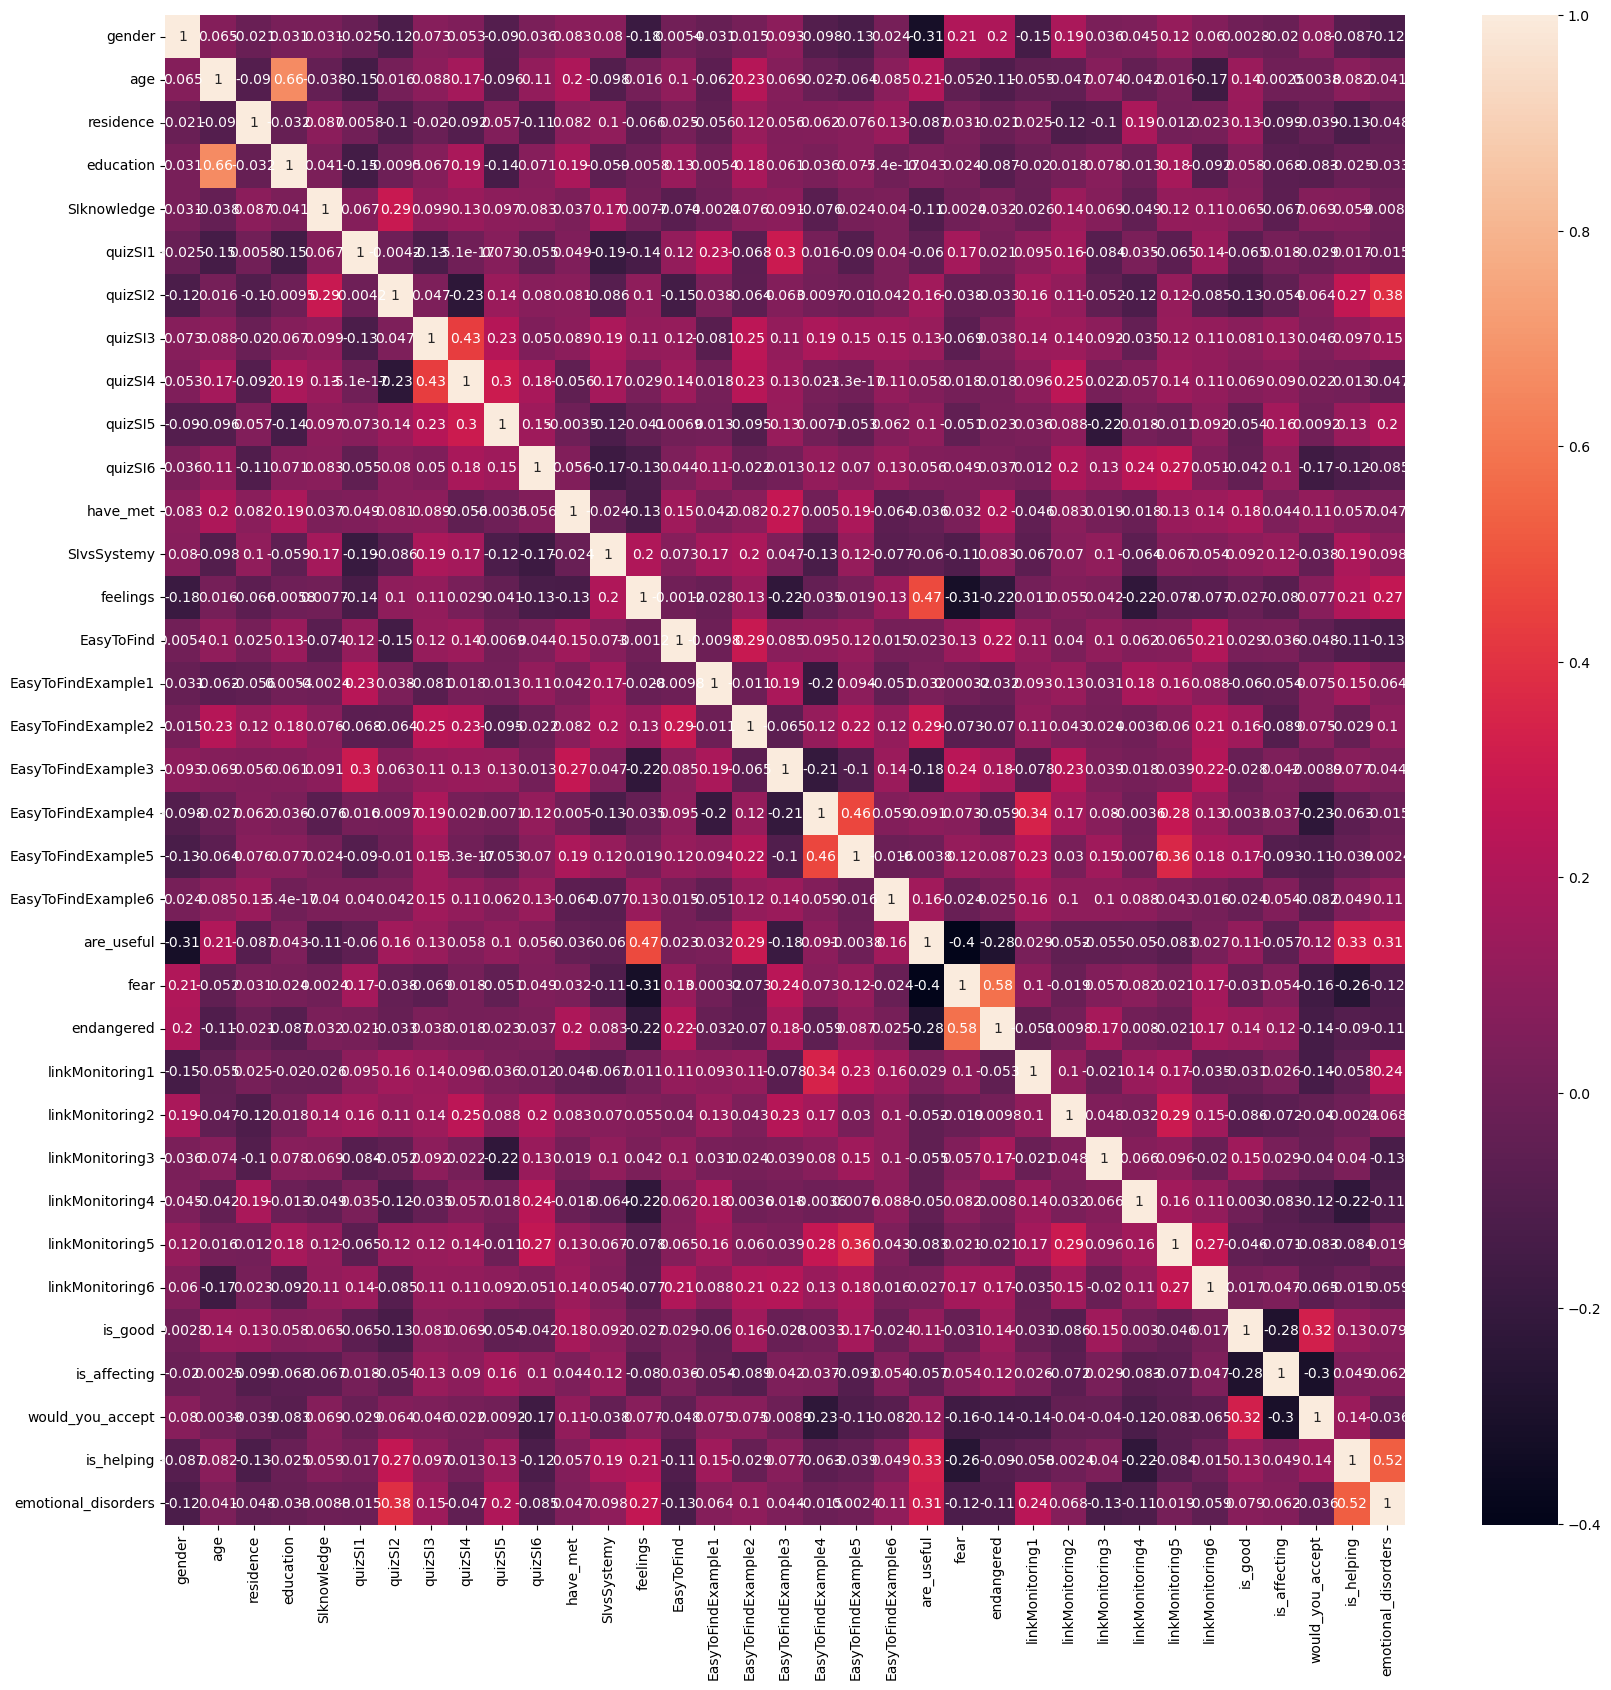

In [33]:
plt.figure(figsize=(20,20),dpi = 100)
sns.heatmap(df.corr(),annot = df.corr())